# DATA EXPLORATION

In [102]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import visuals as vs
%matplotlib inline
from sklearn.model_selection import train_test_split
data=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')

# Statistical caluculation

In [103]:
data.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [104]:
data.corr()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
tot_bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
direct_bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
tot_proteins,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
albumin,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
ag_ratio,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
sgpt,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
sgot,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
alkphos,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
is_patient,-0.137351,-0.220208,-0.246046,-0.184866,-0.163416,-0.151934,0.035008,0.161388,0.163131,1.000000


# Preprocessing the Data

In [105]:
#Treatment for missing values
data.apply(lambda x: sum(x.isnull()),axis=0)

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [106]:
data.nunique()

age                  72
gender                2
tot_bilirubin       113
direct_bilirubin     80
tot_proteins        263
albumin             152
ag_ratio            177
sgpt                 58
sgot                 40
alkphos              69
is_patient            2
dtype: int64

In [107]:
data['gender'].value_counts()

Male      441
Female    142
Name: gender, dtype: int64

In [108]:
# We can see that the column 'alkphos' has 4 missing values
Alkphos=data['alkphos']
print ("length before removing NaN values:%d"%len(data))
data = data[pd.notnull(data['alkphos'])]
print ("length after removing NaN values:%d"%len(data))

length before removing NaN values:583
length after removing NaN values:579


In [109]:
data.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [110]:
data.corr()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
tot_bilirubin,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
direct_bilirubin,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
tot_proteins,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
albumin,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
ag_ratio,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
sgpt,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
sgot,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
alkphos,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
is_patient,-0.133164,-0.220218,-0.246273,-0.183363,-0.163117,-0.151834,0.033614,0.159770,0.163131,1.000000


# Log transform certain features

After removing the column ‘Disease’ from the dataset as it is the label, we display all features in a histogram format to check if any feature is skewed ( contains a small number of outlier values). Skewed features found are Albumin, Direct Bilirubin, A/G ratio, Total Bilirubin, Total Protein. On these, a log transformation is applied to reduce their range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C54393518>,
      dtype=object)

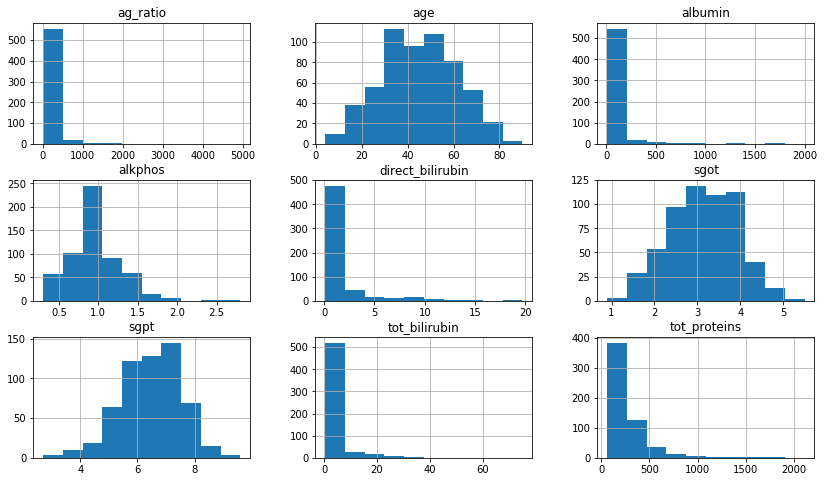

In [111]:
# Split the data into features and target label(disease)
disease_initial = data['is_patient']
features_initial = data.drop('is_patient', axis = 1)

# Visualize skewed continuous features of original data
import matplotlib.pyplot as plt
features_initial.hist(figsize=(14,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C54D411D0>,
      dtype=object)

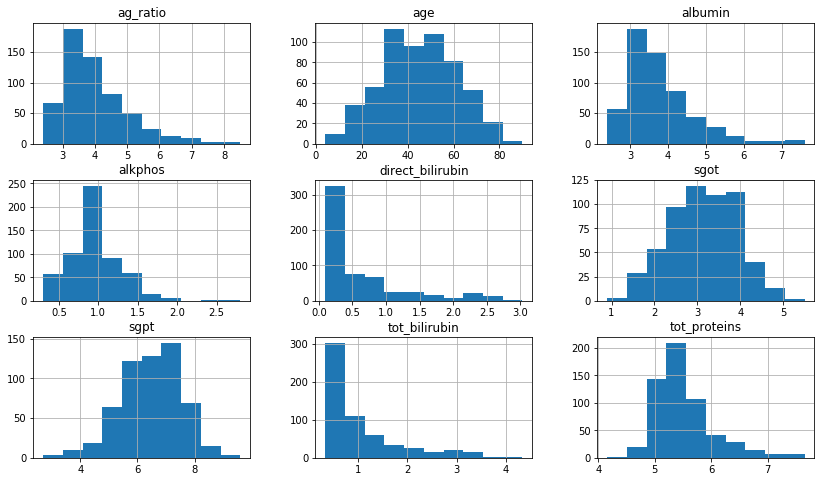

In [112]:
# Skewed features are Albumin, Direct Bilirubin, A/G ratio, Tota Bilirubin, Total Protein 
#Log-transform the skewed features
skewed = ['albumin', 'direct_bilirubin', 'tot_bilirubin', 'ag_ratio', 'tot_proteins']
features_initial[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
features_initial.hist(figsize=(14,8))

In [113]:
# Import sklearn.preprocessing.StandardScaler- producing  values in range of 10^-16
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()

normalized = ['age', 'sgpt', 'sgot', 'alkphos', 'albumin', 'direct_bilirubin', 'tot_bilirubin', 'ag_ratio', 'tot_proteins']
skewed = ['albumin', 'direct_bilirubin', 'tot_bilirubin', 'ag_ratio', 'tot_proteins']
features_initial[normalized] = scaler.fit_transform(data[normalized])

# Show an example of a record with scaling applied
display(features_initial.describe())

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,0.474214,0.039080,0.071129,0.111561,0.035742,0.020414,0.548071,0.486634,0.258826
std,0.188625,0.083481,0.143699,0.118985,0.092052,0.058925,0.157194,0.172703,0.127837
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337209,0.005362,0.005102,0.054958,0.006533,0.003049,0.449275,0.369565,0.160000
50%,0.476744,0.008043,0.010204,0.070835,0.012563,0.006505,0.565217,0.478261,0.252000
75%,0.627907,0.029491,0.061224,0.114802,0.025628,0.015654,0.652174,0.630435,0.320000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# One-Hot Encoding
Then we use pd.get_dummies() method to one-hot encode the feature ‘g ender’ as well as the label ‘Disease’ ( with the integer ‘1’ representing presence of disease). The dataset will be split into training and testing set as a 80-20 split using train_test_split method from sklearn. Random state will be specified as a particular number so that we have a means for comparison later.

In [114]:
#One-hot encode the data using pandas.get_dummies()
features = pd.get_dummies(features_initial)

encoded = list(features.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))
print (encoded)
display(features.head(n = 1))

disease=pd.get_dummies(disease_initial)
encoded = list(disease.columns)
print ("{} disease columns after one-hot encoding.".format(len(encoded)))
display(disease.head(n = 1))

11 total features after one-hot encoding.
['age', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins', 'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'gender_Female', 'gender_Male']


,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,gender_Female,gender_Male
0,0.709302,0.004021,0.0,0.060576,0.003015,0.001626,0.594203,0.521739,0.24,1,0


2 disease columns after one-hot encoding.


,1,2
0,1,0


In [115]:
#split the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, disease[1], test_size = 0.2, random_state = 42)
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 463 samples.
Testing set has 116 samples.


#### Implementation-Evaluating Model Performance Before applying any supervised learning technique, we will implement a naïve predictor, that will simply return that every data point has ‘Disease’= True. We will check our accuracy on that predictor.

Then, we will use F-beta score as another metric, where-

F-beta score = (1+betabeta)precisionrecall/((betabeta*precision)+recall

Precision=TP/ (TP+FP), Recall=TP/ (TP+FN)

TP=True Positive

FP=False Positive

FN=False Negative

Beta= A number that decides relative weightage of precision and recall. In this case, a disease being classified as a non-disease will incur a high penalty. So, more emphasis is placed on recall.

In [116]:
#naive accuracy, assuming that we predict everyone has disease
positive_disease=len(data[data['is_patient'] == 1])
print(positive_disease)
accuracy = positive_disease*1.0/len(data)
precision=accuracy
recall=1
beta=0.5
fscore = (1+beta*beta)*precision*recall/((beta*beta*precision)+recall)
# Print the results 
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

414
Naive Predictor: [Accuracy score: 0.7150, F-score: 0.7582]


### Supervised Learning Approach
I am using these supervised learning approaches for this problem:
1. Logistic Classification: Since the outcome is binary and we have a reasonable number of examples at our disposal compared to number of features, this approach seems suitable. At the core of this method is a logistic or sigmoid function that quantifies the difference between each prediction and its corresponding true value.                                                                  
2. Support Vector Machine:   SVM aims to find an optimal hyperplane that separates the data into different classes.                                  
3. Adaboost:Adaboost is a boosting type ensemble learner. This method works by combining multiple individual "weak" learning hypotheses to create one strong model. Each weak hypothesis used is better at classifying the data than random chance. However, it's the combination of all of these independent weak learning hypotheses what makes the model more capable of predicting accurately on unseen data than each of the individual hypothesis would.

In [121]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    results = {}

    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    results['train_time'] = end - start
        
    start = time() 
    predictions_test = learner.predict(X_test)# predictions on test set
    predictions_train = learner.predict(X_train)# predictions on first 200 elements of training set
    end = time()
    
    results['pred_time'] = end - start
            
    results['acc_train'] = accuracy_score(y_train,predictions_train)
        
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=0.5)
        
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    return results

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression trained on 4 samples.
LogisticRegression trained on 46 samples.
LogisticRegression trained on 463 samples.
AdaBoostClassifier trained on 4 samples.
AdaBoostClassifier trained on 46 samples.
AdaBoostClassifier trained on 463 samples.
SVC trained on 4 samples.
SVC trained on 46 samples.
SVC trained on 463 samples.


C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


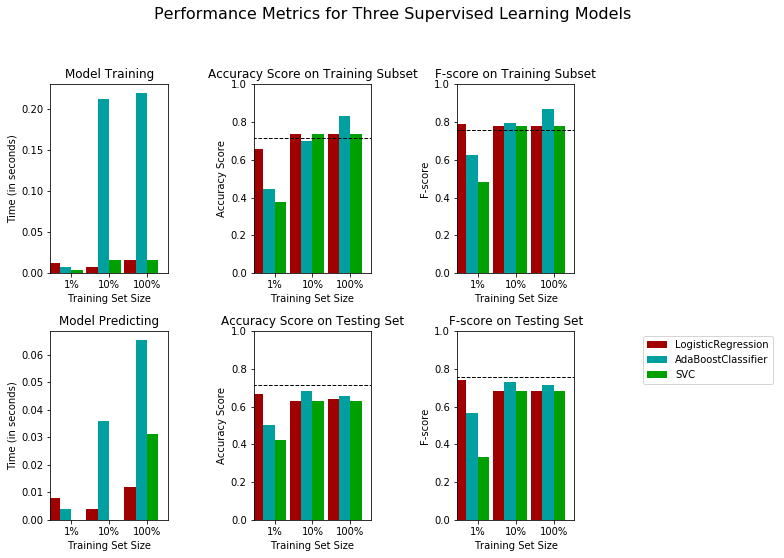

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
#  Initialize the three models

clf_A = LogisticRegression(random_state=10)
clf_B= AdaBoostClassifier(random_state=40)
clf_C=SVC(random_state=42)


#  Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [123]:
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%',1:'10%',2:'100%'})) 

LogisticRegression


,1%,10%,100%
acc_test,0.663793,0.629310,0.637931
acc_train,0.656587,0.736501,0.736501
f_test,0.741840,0.679702,0.684803
f_train,0.788761,0.777474,0.777474
pred_time,0.007998,0.004002,0.012024
train_time,0.011998,0.008001,0.015985


AdaBoostClassifier


,1%,10%,100%
acc_test,0.500000,0.681034,0.655172
acc_train,0.447084,0.699784,0.831533
f_test,0.563910,0.731415,0.714286
f_train,0.624133,0.794203,0.868493
pred_time,0.003999,0.035938,0.065323
train_time,0.008008,0.212402,0.218737


SVC


,1%,10%,100%
acc_test,0.422414,0.629310,0.629310
acc_train,0.377970,0.736501,0.736501
f_test,0.333333,0.679702,0.679702
f_train,0.481283,0.777474,0.777474
pred_time,0.000000,0.000000,0.031249
train_time,0.004477,0.015623,0.015653


# ROC Curve
An additional metric called as Receiver Operator Characteristics(ROC) curve will be used. It plots the curve of True Positive Rate vs the False positive Rate, with a greater area under the curve indicating a better True Positive Rate for the same False Positive Rate. This can be helpful in this case as simply knowing the number of correct predictions may not suffice

For classifier LogisticRegression, ROC score is 0.511628


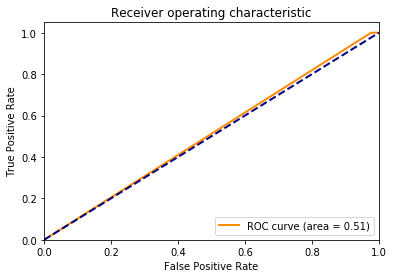

For classifier AdaBoostClassifier, ROC score is 0.601784


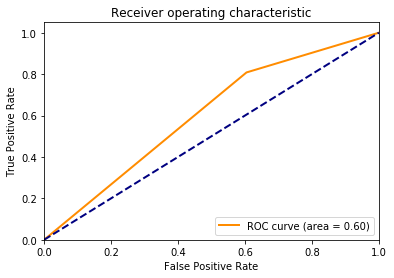

For classifier SVC, ROC score is 0.500000


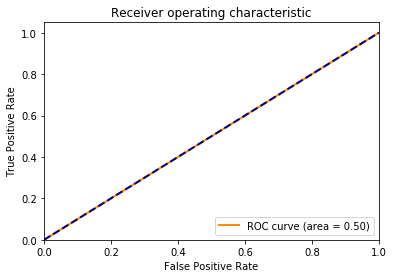

In [124]:
from sklearn.metrics import roc_curve,auc
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    pred=clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, pred)
    roc_auc = auc(fpr, tpr)
    print ("For classifier %s, ROC score is %f"%(clf_name,roc_auc))
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import AdaBoostClassifier
# Initialize the classifier

clf = AdaBoostClassifier(random_state=0)

#  Create the parameters list you wish to tune, using a dictionary if needed.
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'n_estimators':[50,100,150],'learning_rate':[0.5,1.0,2.0],'random_state':[20,40,42]}

#  Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,param_grid=parameters,scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
    

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Unoptimized model
------
Accuracy score on testing data: 0.6552
F-score on testing data: 0.7143

Optimized Model
------
Final accuracy score on the testing data: 0.6724
Final F-score on the testing data: 0.7284


# Extracting important features

From a medical perspective, it may be important to know which features are most influential in determining whether a person has a disease or not. Also, in future, it may be possible that more examples are collected for this dataset, and we may want to use only the k best features for this dataset for classification purpose. Keeping this in mind, we will use the Adaboost Classifier to extract the features of greatest importance.

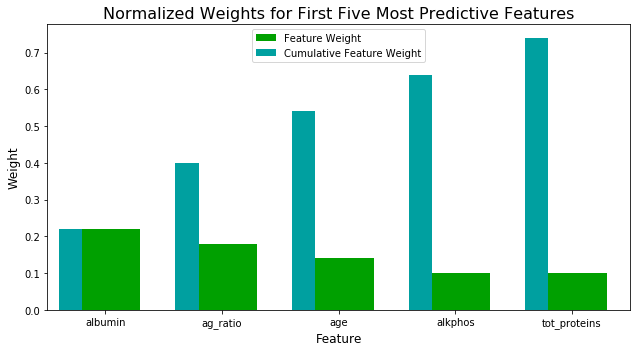

In [126]:
clf_new=clf_B.fit(X_train,y_train)#clf_A is Adaboost Classifier
im_features = clf_new.feature_importances_
vs.feature_plot(im_features, X_train, y_train)

#### Result
Here the best model is Adaboost from the three models because adaboost has the high f-score and accuracy score compare to reamining two models